In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch
%matplotlib inline

# Table of Contents

1. [Command Prompt MCK](#CommandPrompt_MCK)
2. [Process Comparisons](#Process_Comparisons)
    1. [Process Kappa](#Process_Kappa)
    2.[Process KappaLoc](#Process_KappaLoc)
    3. [Process KappaHisto](#Process_KappaHisto)
    4. [Process FractalDimension](#Process_FractalDimension)
    5. [Process_Simpsons Diversity Index](#Process_Simpsons)
    6. [Process_Clumpiness](#Process_Clumpiness)
3. [Clustering Metrics](#Clustering_Metrics)
4. [Dendrogram Clusters](#Dendrogram_Clustering)
5. [Graphing Clusters](#Graphing_Clusters)

# CommandPrompt_MCK

<font size="5">Functional</font>

In [ ]:
# Cmd for kappa (also contains kappa loc and kappa histo)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappa.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for fractal dimension
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fractaldimension.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [27]:
# Cmd for Simpson's Diversity Index
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\simpsons.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

<font size="5">Not working for various reasons</font>

In [3]:
# Cmd for kappa simulation (no base map in csl)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

In [7]:
# Cmd for fuzzy kappa simulation (no base map in csl)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fuzzykappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

In [ ]:
# Cmd for fuzzy kappa (only runs 1 of the comparisons and doesn't calculate the right value)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappafuzzy_orig.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

<font size="5">Results not varied</font>

In [3]:
# Cmd for clumpiness
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\clumpiness.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

<font size="6">Create DataFrames</font>

In [2]:
def df_gen(dims=100):
    rows, cols = rowscols(dims)
    df = pd.DataFrame(index=rows, columns = cols)
    np.fill_diagonal(df.values, 1)
    return df

def rowscols(nrmaps):
    df_init = []
    for i in range(nrmaps):
        df_init.append('map' + str(i))
    return df_init, df_init

In [3]:
df_kappa = df_gen(100)
df_kappa.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map6,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_clumpi = df_gen(5)
df_fractal = df_gen(5)
df_simpsons = df_gen(5)
df_5 = df_gen(5)
df_100 = df_gen(100)

# Process_Comparisons

# Process_Kappa

In [5]:
#Slow cell to process
for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' kappa="')
                        loc_start = loc + len(' kappa="')
                        loc_end =  line.find('"', loc_start)
                        df_kappa.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_kappa.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [6]:
df_kappa = df_kappa.astype(float).round(decimals=3)
kappa_dist = 1 - df_kappa
kappa_dist[kappa_dist < 0] = 0
kappa_dist.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,0.000,0.062,0.082,0.054,0.047,0.054,0.088,0.087,0.091,0.064,...,0.065,0.081,0.086,0.068,0.081,0.078,0.079,0.086,0.075,0.083
map1,0.062,0.000,0.037,0.017,0.061,0.017,0.043,0.045,0.049,0.065,...,0.076,0.034,0.040,0.048,0.041,0.053,0.034,0.045,0.032,0.038
map2,0.082,0.037,0.000,0.036,0.069,0.036,0.042,0.042,0.045,0.073,...,0.077,0.031,0.044,0.049,0.028,0.058,0.044,0.047,0.038,0.047
map3,0.054,0.017,0.036,0.000,0.062,0.000,0.042,0.040,0.049,0.074,...,0.081,0.042,0.044,0.045,0.042,0.057,0.032,0.044,0.031,0.038
map4,0.047,0.061,0.069,0.062,0.000,0.062,0.068,0.075,0.077,0.055,...,0.044,0.059,0.063,0.053,0.060,0.051,0.050,0.075,0.041,0.052
map5,0.054,0.017,0.036,0.000,0.062,0.000,0.042,0.040,0.049,0.074,...,0.081,0.042,0.044,0.045,0.042,0.057,0.032,0.044,0.031,0.038
map6,0.088,0.043,0.042,0.042,0.068,0.042,0.000,0.036,0.017,0.077,...,0.070,0.038,0.025,0.051,0.034,0.055,0.027,0.040,0.032,0.027
map7,0.087,0.045,0.042,0.040,0.075,0.040,0.036,0.000,0.043,0.080,...,0.094,0.050,0.050,0.033,0.046,0.062,0.035,0.019,0.040,0.035
map8,0.091,0.049,0.045,0.049,0.077,0.049,0.017,0.043,0.000,0.081,...,0.070,0.041,0.027,0.057,0.035,0.060,0.035,0.042,0.041,0.035
map9,0.064,0.065,0.073,0.074,0.055,0.074,0.077,0.080,0.081,0.000,...,0.055,0.065,0.066,0.061,0.074,0.045,0.077,0.079,0.071,0.080


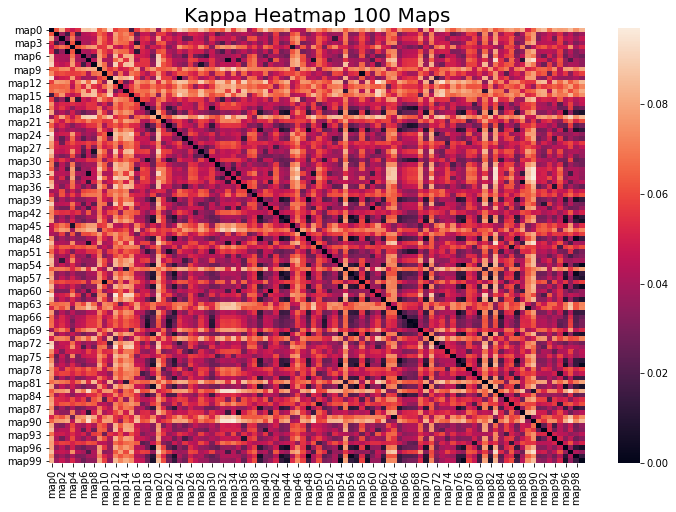

In [7]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(kappa_dist)
_ = plt.title("Kappa Heatmap 100 Maps", fontsize =20)

# Process_KappaLoc

In [8]:
df_loc = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' klocation="')
                        loc_start = loc + len(' klocation="')
                        loc_end =  line.find('"', loc_start)
                        df_loc.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_loc.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [9]:
df_loc = df_loc.astype(float).round(decimals=3)
loc_dist = 1 - df_loc
loc_dist[loc_dist < 0] = 0
loc_dist.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,0.000,0.016,0.047,0.008,0.016,0.008,0.036,0.045,0.049,0.060,...,0.060,0.035,0.041,0.034,0.036,0.046,0.003,0.043,0.006,0.007
map1,0.016,0.000,0.025,0.015,0.025,0.015,0.032,0.030,0.035,0.023,...,0.029,0.033,0.034,0.036,0.036,0.037,0.003,0.030,0.009,0.005
map2,0.047,0.025,0.000,0.027,0.027,0.027,0.022,0.030,0.033,0.041,...,0.042,0.018,0.030,0.032,0.014,0.043,0.004,0.032,0.005,0.004
map3,0.008,0.015,0.027,0.000,0.026,0.000,0.031,0.026,0.036,0.033,...,0.037,0.038,0.039,0.034,0.037,0.043,0.002,0.028,0.007,0.004
map4,0.016,0.025,0.027,0.026,0.000,0.026,0.024,0.032,0.033,0.024,...,0.008,0.022,0.026,0.027,0.023,0.023,0.006,0.031,0.004,0.007
map5,0.008,0.015,0.027,0.000,0.026,0.000,0.031,0.026,0.036,0.033,...,0.037,0.038,0.039,0.034,0.037,0.043,0.002,0.028,0.007,0.004
map6,0.036,0.032,0.022,0.031,0.024,0.031,0.000,0.027,0.007,0.028,...,0.014,0.028,0.018,0.033,0.027,0.031,0.004,0.030,0.006,0.005
map7,0.045,0.030,0.030,0.026,0.032,0.026,0.027,0.000,0.042,0.041,...,0.049,0.035,0.037,0.015,0.034,0.038,0.003,0.016,0.005,0.003
map8,0.049,0.035,0.033,0.036,0.033,0.036,0.007,0.042,0.000,0.041,...,0.023,0.027,0.015,0.039,0.023,0.036,0.003,0.039,0.006,0.003
map9,0.060,0.023,0.041,0.033,0.024,0.033,0.028,0.041,0.041,0.000,...,0.047,0.022,0.023,0.029,0.031,0.013,0.004,0.039,0.006,0.007


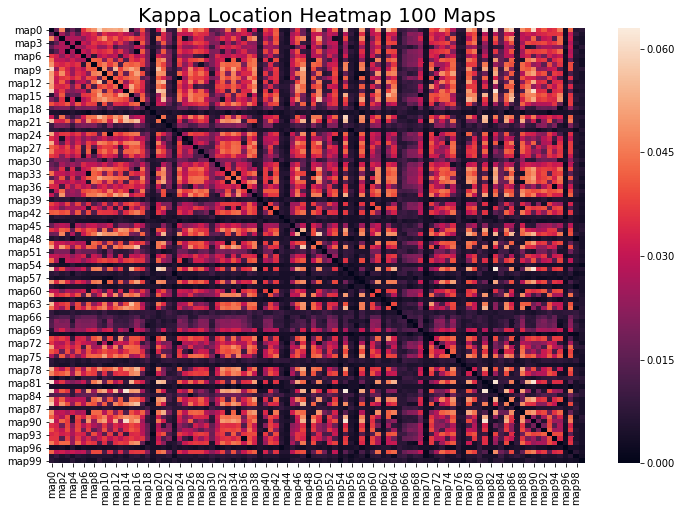

In [10]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(loc_dist)
_ = plt.title("Kappa Location Heatmap 100 Maps", fontsize =20)

# Process_KappaHisto

In [11]:
df_histo = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' khisto="')
                        loc_start = loc + len(' khisto="')
                        loc_end =  line.find('"', loc_start)
                        df_histo.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_histo.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [12]:
df_histo = df_histo.astype(float).round(decimals=3)
histo_dist = 1 - df_histo
histo_dist[histo_dist < 0] = 0
histo_dist.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,0.000,0.046,0.037,0.046,0.032,0.046,0.054,0.044,0.045,0.004,...,0.005,0.047,0.047,0.036,0.047,0.033,0.076,0.045,0.069,0.076
map1,0.046,0.000,0.012,0.002,0.037,0.002,0.011,0.015,0.015,0.043,...,0.048,0.002,0.006,0.013,0.005,0.016,0.030,0.015,0.024,0.034
map2,0.037,0.012,0.000,0.010,0.043,0.010,0.021,0.013,0.013,0.033,...,0.036,0.013,0.015,0.018,0.014,0.016,0.040,0.016,0.033,0.043
map3,0.046,0.002,0.010,0.000,0.037,0.000,0.011,0.014,0.014,0.043,...,0.046,0.004,0.005,0.011,0.005,0.014,0.030,0.016,0.024,0.034
map4,0.032,0.037,0.043,0.037,0.000,0.037,0.045,0.045,0.045,0.032,...,0.037,0.038,0.038,0.026,0.038,0.028,0.045,0.045,0.038,0.045
map5,0.046,0.002,0.010,0.000,0.037,0.000,0.011,0.014,0.014,0.043,...,0.046,0.004,0.005,0.011,0.005,0.014,0.030,0.016,0.024,0.034
map6,0.054,0.011,0.021,0.011,0.045,0.011,0.000,0.010,0.010,0.051,...,0.057,0.010,0.007,0.018,0.007,0.025,0.023,0.010,0.025,0.023
map7,0.044,0.015,0.013,0.014,0.045,0.014,0.010,0.000,0.001,0.041,...,0.047,0.015,0.013,0.018,0.013,0.025,0.032,0.004,0.035,0.032
map8,0.045,0.015,0.013,0.014,0.045,0.014,0.010,0.001,0.000,0.042,...,0.048,0.015,0.013,0.019,0.012,0.025,0.032,0.003,0.035,0.032
map9,0.004,0.043,0.033,0.043,0.032,0.043,0.051,0.041,0.042,0.000,...,0.009,0.044,0.044,0.033,0.044,0.033,0.073,0.042,0.066,0.073


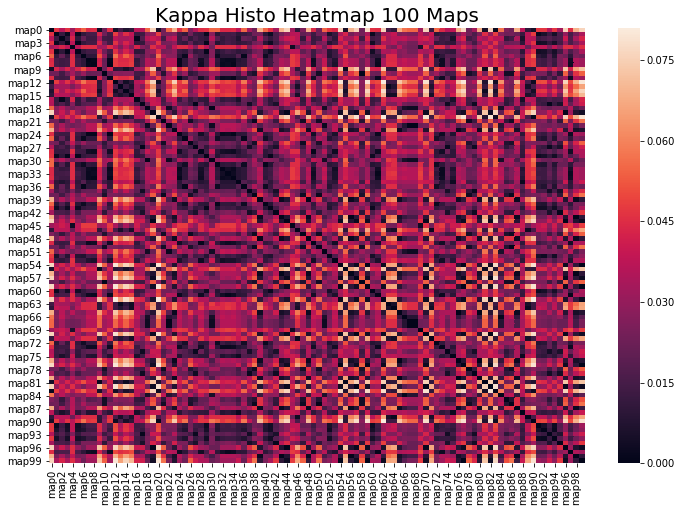

In [13]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(histo_dist)
_ = plt.title("Kappa Histo Heatmap 100 Maps", fontsize =20)

# Process_FractalDimension

In [14]:
fractal_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/fractaldimension/' + 'fractaldimension' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                fractal_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                fractal_list.append(line[loc_start2:loc_end2])

In [15]:
map_list = []
for i in range(100):
    name = 'Map' +" " +  str(i)
    map_list.append(name)

In [16]:
#Use for testing
map_list2 = []
for i in range(6):
    name = 'Map' + " " +  str(i)
    map_list2.append(name)

In [26]:
map_list3 = []
for i in range(40):
    name = 'Map' + " " +  str(i)
    map_list2.append(name)

In [17]:
df_fractal = pd.DataFrame(fractal_list, index = map_list, columns=['FractalDimension'])
df_fractal = df_fractal.astype(float).round(decimals=5)
df_fractal.head(10)

,FractalDimension
Map 0,1.46605
Map 1,1.62730
Map 2,1.62857
Map 3,1.46645
Map 4,1.63096
Map 5,1.46643
Map 6,1.46532
Map 7,1.62941
Map 8,1.62904
Map 9,1.46107


From Fragstats manual:
Range of metric: 1 > FRAC < 2<br>
A fractal dimension greater than 1 for a 2-dimensional patch indicates a departure 
from Euclidean geometry (i.e., an increase in shape complexity). <br>
FRAC approaches 1 for shapes with very simple perimeters such as squares, and
approaches 2 for shapes with highly convoluted, plane-filling perimeters.<br>

# Process_Simpsons

In [18]:
#cleaner string management
simpson_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/simpsons/' + 'simpsons' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                simpson_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                simpson_list.append(line[loc_start2:loc_end2])

In [19]:
df_simpsons = pd.DataFrame(simpson_list, index = map_list, columns=["Simpson's Diversity Index"])
df_simpsons = df_simpsons.astype(float).round(decimals=5)
df_simpsons.head(10)

,Simpson's Diversity Index
Map 0,0.86811
Map 1,0.86293
Map 2,0.86402
Map 3,0.86362
Map 4,0.86650
Map 5,0.86362
Map 6,0.86132
Map 7,0.86135
Map 8,0.86142
Map 9,0.86695


# Process_Clumpiness

In [30]:
#Use for testing
map_list3 = []
for i in range(40):
    name = 'Map' + " " +  str(i)
    map_list3.append(name)

In [21]:
#cleaner string management
clumpi_list = []
for i in range(0, 39, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/clumpiness/' + 'clumpiness' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                clumpi_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                clumpi_list.append(line[loc_start2:loc_end2])  

In [33]:
df_clumpiness = pd.DataFrame(clumpi_list, index = map_list3, columns=["Clumpiness Index"])
df_clumpiness = df_clumpiness
df_clumpiness.head(10)

,Clumpiness Index
Map 0,0.24699664133275431
Map 1,0.24699664133275431
Map 2,0.24699664133275431
Map 3,0.24699664133275431
Map 4,0.24699664133275431
Map 5,0.24699664133275431
Map 6,0.24699664133275431
Map 7,0.24699664133275431
Map 8,0.24699664133275431
Map 9,0.24699664133275431


# Dendrogram_Clustering

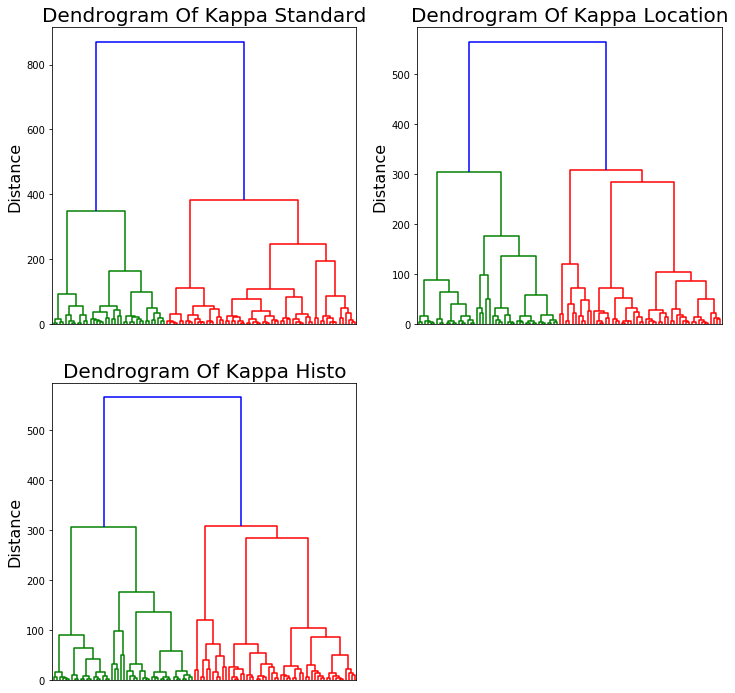

In [43]:
fig = plt.figure(figsize=(12, 12))
#Kappa Standard
#Turn distance matrix into condensed form
kappa_condensed = sch.linkage(squareform(kappa_dist))

plt.subplot(2, 2, 1)
sch.dendrogram(sch.linkage(kappa_condensed, method='ward'), labels=map_list)
ax_kappa = plt.gca()
ax_kappa.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Standard', fontsize=20)
plt.ylabel('Distance', fontsize=16)


#plt.savefig('kappa.png', format='png', bbox_inches='tight')

#kappa location dendrogram
#Turn distance matrix into condensed form
loc_condensed = sch.linkage(squareform(loc_dist))

plt.subplot(2, 2, 2)
sch.dendrogram(sch.linkage(loc_condensed, method='ward'), labels=map_list)
ax_loc = plt.gca()
ax_loc.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Location', fontsize=20)
plt.ylabel('Distance', fontsize=16)


#kappa histo dendrogram
#Turn distance matrix into condensed form
histo_condensed = sch.linkage(squareform(loc_dist))

plt.subplot(2, 2, 3)
sch.dendrogram(sch.linkage(histo_condensed, method='ward'), labels=map_list)
ax_histo = plt.gca()
ax_histo.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Histo', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.show()

# Clustering_Metrics

In [35]:
kappaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(kappa_dist)
locationclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(loc_dist)
histoclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(histo_dist)

In [36]:
kappa_labels = kappaclustering.labels_
loc_labels = locationclustering.labels_
histo_labels = histoclustering.labels_
sil_kappa = metrics.silhouette_score(kappa_dist, kappa_labels, metric='euclidean')
sil_loc = metrics.silhouette_score(loc_dist, loc_labels, metric='euclidean')
sil_histo = metrics.silhouette_score(histo_dist, histo_labels, metric='euclidean')
#print(sil_kappa, sil_loc, sil_histo).format{}
print("Silhouette score for Kappa Standard: {:.3f}\nSilhouette score for Kappa Location: {:.3f}\nSilhouette score for Kappa Histo: {:.3f}".format(sil_kappa, sil_loc, sil_histo))

Silhouette score for Kappa Standard: 0.249
Silhouette score for Kappa Location: 0.130
Silhouette score for Kappa Histo: 0.579


In [37]:
df_cluster = pd.DataFrame(index = map_list, columns=['Cluster Kappa', 'Cluster Location', 'Cluster Histo'])
df_cluster['Cluster Kappa'] = kappa_labels
df_cluster['Cluster Location'] = loc_labels
df_cluster['Cluster Histo'] = histo_labels

df_cluster.head(5)

,Cluster Kappa,Cluster Location,Cluster Histo
Map 0,1,2,1
Map 1,0,2,0
Map 2,0,0,0
Map 3,0,2,0
Map 4,1,0,3


# Graphing_Clusters

In [41]:
xlabels = []
for i in range(0, 100, 10):
    name = 'Map' +" " +  str(i)
    xlabels.append(name)
xlabels.append('Map 99')

ylabels = [0, 1, 2, 3]

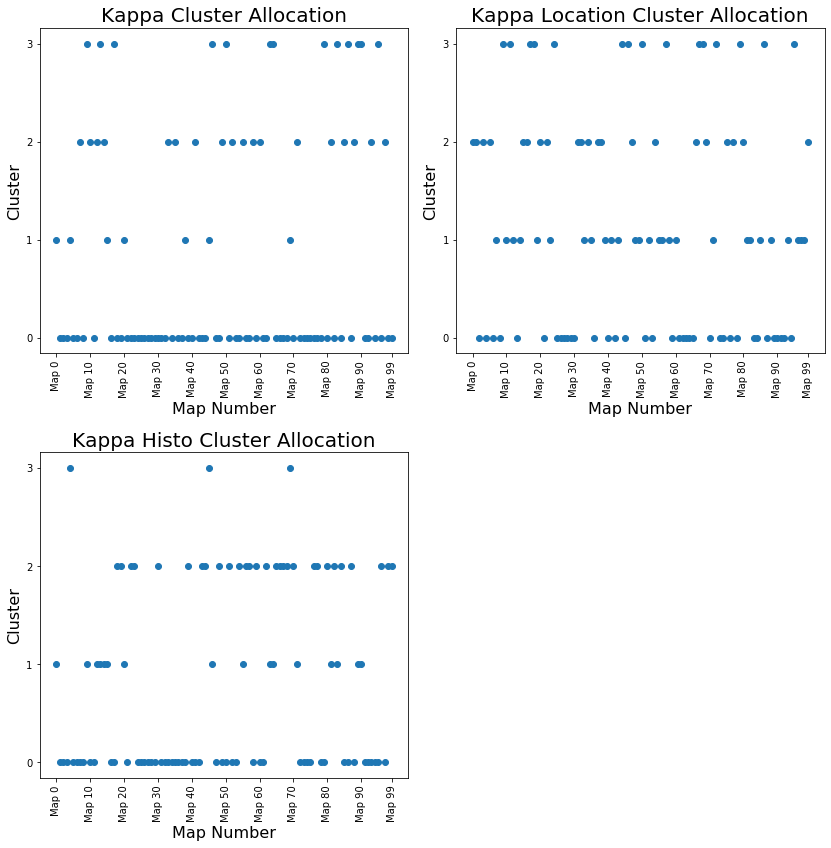

In [46]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(map_list, kappa_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(2, 2, 2)
plt.scatter(map_list, loc_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Location Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(2, 2, 3)
plt.scatter(map_list, histo_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Histo Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

fig.tight_layout(pad=1.5)

plt.show()